This notebook allows to test `DataPreparator` class.

Such object allows to process the whole pipeline for texts tokenization and vectorization.

Tokenization part of transformation process includes : 

    * Entities detection and replacement with a key word
    * Unknown words from vocabulary replacement with a key word.

A transformed dataset is tested with the linear classifier `LinearSVC` from `scikit-learn` against 2 transformations : 

    * BOW transformation using Keras vectorizer
    * DataPreparator transformation

    TBD : 
* Rework tokenization process from inside DataPreparator : most frequent words out of stop-words must not be applied to lemmatization. DONE!
* Write method `tokenizer` allowing to fix parameter `tokenizer` into `CountVectorizer` object: DONE
* Apply TF-IDF coefficients to vectors coefficients issued from customized spacy process: DONE
* Implements classification transformation for targets : DONE!
        

In [1]:
import jyquickhelper
jyquickhelper.add_notebook_menu(first_level=1, last_level=4, header="DataPreparator test")

In [49]:
%load_ext autoreload
%autoreload 2

%reload_ext autoreload

# <font color=blus>1. Loading Data</font>

## <font color=blus>1.1. Loading dataset </font>

In [2]:
import pandas as pd
import p5_util

filename_train = './data/df_train.dump'
filename_test  = './data/df_test.dump'

if False: 
    df_train = pd.DataFrame({'X':X_train, 'y':y_train})
    df_test  = pd.DataFrame({'X':X_test, 'y':y_test})
    
    p5_util.object_dump(df_train,filename_train)
    p5_util.object_dump(df_test,filename_test)
    
else : 
    df_train = p5_util.object_load(filename_train)
    df_test  = p5_util.object_load(filename_test)

print("")
print("Shape of train corpus : = {}".format(df_train.shape))
print("Shape of test corpus  : = {}".format(df_test.shape))

p5_util.object_load : fileName= ./data/df_train.dump
p5_util.object_load : fileName= ./data/df_test.dump

Shape of train corpus : = (1209265, 2)
Shape of test corpus  : = (595609, 2)


In [3]:
df_train.columns

Index(['X', 'y'], dtype='object')

### Build a sample with all targets range from train dataset

In [4]:
n_sample = 11

In [5]:
import numpy as np
df_sample = pd.DataFrame()
for val in range(n_sample):
    arr_index = np.where(df_train['y']==val/10)[0][0]
    X = df_train.iloc[arr_index]['X']
    y = df_train.iloc[arr_index]['y']
    
    df = pd.DataFrame({'X':X, 'y':y}, index=[0])
    df_sample = pd.concat([df_sample,df], axis=0,ignore_index=True,)
df_sample

,X,y
0,some city council members support her.... .......,0.0
1,i am not sure i understand this article. i agr...,0.1
2,what is repugnant of her attitude and the ungr...,0.2
3,just a non-related coincidence...................,0.3
4,not that much of a problem. he shot at and hit...,0.4
5,if individually they too fit the unappetizing ...,0.5
6,you say it’s racist to see black men as being ...,0.6
7,i wouldn't equate being ignorant to being a so...,0.7
8,"no, they're noting that roger ailes is a despi...",0.8
9,"how about ""bully in blue suit gets drop on una...",0.9


## <font color=blus>1.2. Building a dataset</font>

In [2]:
import numpy as np
import pandas as pd

doc1 = "hello, The 20, big grey dogs all named John don't ate all of the chocolate, but fortunately he wasn't sick!"
doc2 = "Hello world! Hello trumpets! The world is grey..."
doc3 ="hello, Ah! gaomlebdo..."
doc4 ="hello, dady's home is a big area that is'nt pleasant."
doc5 ="hello america, like santiago 's great fish, is now inert and being circled by sharks : russia, china, north korea.   this time , unlike any time since the civil war , it 's existential .   and who do we have protecting our way of life ?   i 'd say the keystone kops , but they actually always   got their man .   this crew is better described by macbeth :   "" . . . a tale , told by an idiot , full of sound and fury , and signifying nothing . """
corpus = [doc3, doc2, doc1, doc4, doc5]

y=np.asarray([i for i in range(len(corpus))])

print(y)

dict_corpus={'X':corpus, 'y':[y for y in range(0,len(corpus))]}
print(dict_corpus)
df_corpus = pd.DataFrame(dict_corpus, index=[y for y in range(0,len(corpus))])

df_corpus

[0 1 2 3 4]
{'X': ['hello, Ah! gaomlebdo...', 'Hello world! Hello trumpets! The world is grey...', "hello, The 20, big grey dogs all named John don't ate all of the chocolate, but fortunately he wasn't sick!", "hello, dady's home is a big area that is'nt pleasant.", "hello america, like santiago 's great fish, is now inert and being circled by sharks : russia, china, north korea.   this time , unlike any time since the civil war , it 's existential .   and who do we have protecting our way of life ?   i 'd say the keystone kops , but they actually always   got their man .   this crew is better described by macbeth :    . . . a tale , told by an idiot , full of sound and fury , and signifying nothing . "], 'y': [0, 1, 2, 3, 4]}


,X,y
0,"hello, Ah! gaomlebdo...",0
1,Hello world! Hello trumpets! The world is grey...,1
2,"hello, The 20, big grey dogs all named John do...",2
3,"hello, dady's home is a big area that is'nt pl...",3
4,"hello america, like santiago 's great fish, is...",4


# <font color=blus>2. Testing `DataPreparator`</font>

## <font color=blus>2.1. Unit test : `DataPreparator.fit` when target is `None`</font>

In [704]:
import DataPreparator

dataPreparator = DataPreparator.DataPreparator(min_doc_len=4)
self = dataPreparator

self.fit(corpus)
self.df_data

,docs
0,"hello, Ah! gaomlebdo..."
1,Hello world! The world is grey...
2,"hello, The 20, big grey dogs all named John do..."
3,"hello, dady's home is a big area that is'nt pl..."
4,"hello america, like santiago 's great fish, is..."


## <font color=blus>2.2. Unit test : `DataPreparator.fit` with target</font>

In [705]:
y=np.asarray([i for i in range(len(corpus))])

print(y)

#import DataPreparator

dataPreparator = DataPreparator.DataPreparator(min_doc_len=4)
self = dataPreparator

self.fit(corpus,y)
self.df_data

[0 1 2 3 4]


,docs,target
0,"hello, Ah! gaomlebdo...",0
1,Hello world! The world is grey...,1
2,"hello, The 20, big grey dogs all named John do...",2
3,"hello, dady's home is a big area that is'nt pl...",3
4,"hello america, like santiago 's great fish, is...",4


## <font color=blus>2.3. Unit test : `DataPreparator.fit` + `DataPreparator.transform`</font>

In [6]:
import DataPreparator

dataPreparator = DataPreparator.DataPreparator(min_doc_len=4)
self = dataPreparator

self.fit(corpus,y)

#print(self.X)
self.df_data

X,y = self.transform()
print(X)
print("")
print(y)
self.df_data

spacy_clean : list_word_most_frequent length= 55
spacy_clean : list_word_most_frequent length= 3
spacy_clean : list_word_most_frequent length= 4
spacy_clean : list_word_most_frequent length= 11
spacy_clean : list_word_most_frequent length= 7
spacy_clean : list_word_most_frequent length= 36
[[ 2.84044176e-03  4.52739162e-03 -1.38072992e-03 ...  5.59997385e-03
  -2.90898862e-03  1.55821764e-03]
 [-1.57047858e-03 -3.94367588e-03 -6.88491004e-03 ... -6.17553101e-03
   4.45910196e-04  1.05588149e-03]
 [ 3.57008855e-03  5.47934189e-03 -1.21641764e-02 ... -8.35349162e-04
  -4.62114010e-03 -7.43390943e-04]
 [-2.66431244e-02  1.28222519e-03  5.78991603e-05 ...  2.07061447e-02
  -1.96218033e-02 -4.28440660e-03]]

[ 2.  3.  4. nan]


,docs,tokens,counting,vector,target
1,Hello world ! Hello trumpets ! The world is gr...,"[hello, world, hello, trumpets, world, grey]",6,"[0.0028404417634010316, 0.004527391617496808, ...",2.0
2,"hello , The 20 , big grey dogs all named John ...","[hello, big, grey, dogs, named, ate, chocolate...",9,"[-0.0015704785784085593, -0.003943675880630811...",3.0
3,"hello , dady 's home is a big area that is'nt ...","[hello, dady, home, big, area, is'nt, pleasant]",7,"[0.003570088545481364, 0.0054793418943881985, ...",4.0
4,"hello america , like santiago 's great fish , ...","[hello, like, great, fish, inert, circled, sha...",35,"[-0.026643124396602314, 0.0012822251891096432,...",NaN


## <font color=blus>2.4. Unit test : `DataPreparator.transform` after corpus transformation</font>

    This test allwos to validate a document transformation DataPreparator to be fit and transform.

In [707]:
print(self.df_data.columns)
corpus[-1]

Index(['docs', 'tokens', 'counting', 'vector', 'target'], dtype='object')


"hello america, like santiago 's great fish, is now inert and being circled by sharks : russia, china, north korea.   this time , unlike any time since the civil war , it 's existential .   and who do we have protecting our way of life ?   i 'd say the keystone kops , but they actually always   got their man .   this crew is better described by macbeth :    . . . a tale , told by an idiot , full of sound and fury , and signifying nothing . "

In [715]:
# The last document from corpus is selected
doc = corpus[-1]
X = self.transform(doc)
print(X.shape)
X[0][:5]

(1, 300)


array([-0.04145703,  0.00957224, -0.01037137, -0.02114722,  0.01743454])

## <font color=blus>2.5. Unit test : `DataPreparator.transform` with no parameter</font>

    Should return vectorized corpus as well as target.

In [719]:
for document in corpus :
    print(document)

hello, Ah! gaomlebdo...
Hello world! The world is grey...
hello, The 20, big grey dogs all named John don't ate all of the chocolate, but fortunately he wasn't sick!
hello, dady's home is a big area that is'nt pleasant.
hello america, like santiago 's great fish, is now inert and being circled by sharks : russia, china, north korea.   this time , unlike any time since the civil war , it 's existential .   and who do we have protecting our way of life ?   i 'd say the keystone kops , but they actually always   got their man .   this crew is better described by macbeth :    . . . a tale , told by an idiot , full of sound and fury , and signifying nothing . 


In [718]:
X,y = self.transform()
print(X.shape, y.shape)
self.df_data

(4, 300) (4,)


,docs,tokens,counting,vector,target
1,Hello world ! The world is grey ...,"[hello, world, world, grey]",4,"[0.0023407859851916632, 0.004395464559396108, ...",None
2,"hello , The 20 , big grey dogs all named John ...","[hello, big, grey, dog, name, ate, chocolate, ...",9,"[-0.002206428349018097, -0.0029030857731898625...",None
3,"hello , dady 's home is a big area that is'nt ...","[hello, dady, home, big, area, is'nt, pleasant]",7,"[0.003570088545481364, 0.0054793418943881985, ...",None
4,"hello america , like santiago 's great fish , ...","[hello, like, great, fish, inert, circle, shar...",35,"[-0.0414570323874553, 0.009572240822017193, -0...",None


## <font color=blus>2.6. Unit test : `DataPreparator.fit_transform` </font>

    fit_transform method should result in calling fit() then transform() methods.

In [808]:
#import DataPreparator
import numpy as np
dataPreparator = DataPreparator.DataPreparator(min_doc_len=4)
self = dataPreparator
y = np.ones(len(corpus))
X,y = self.fit_transform(corpus,y)
print(X.shape)
print("")
print(y.shape)
self.df_data

(4, 300)

(4,)


,docs,tokens,counting,vector,target
1,Hello world ! The world is grey ...,"[hello, world, world, grey]",4,"[0.0023407859851916632, 0.004395464559396108, ...",1.0
2,"hello , The 20 , big grey dogs all named John ...","[hello, big, grey, dog, name, ate, chocolate, ...",9,"[-0.002206428349018097, -0.0029030857731898625...",1.0
3,"hello , dady 's home is a big area that is'nt ...","[hello, dady, home, big, area, is'nt, pleasant]",7,"[0.003570088545481364, 0.0054793418943881985, ...",1.0
4,"hello america , like santiago 's great fish , ...","[hello, like, great, fish, inert, circle, shar...",35,"[-0.0414570323874553, 0.009572240822017193, -0...",1.0


## <font color=blus>2.7. Unit test : `DataPreparator.X` and `DataPreparator.y` </font>

## <font color=blus>2.6. Unit test : `DataPreparator.fit_transform` </font>

#### Returns data prepared X and y

In [809]:
print(self.X.shape)
print(self.y.shape)
print(self.y)

(4, 300)
(4,)
[1. 1. 1. 1.]


## <font color=blus>2.8. Unit test : `DataPreparator.fit_transform` with no parameter</font>

In [810]:
doc

"hello america, like santiago 's great fish, is now inert and being circled by sharks : russia, china, north korea.   this time , unlike any time since the civil war , it 's existential .   and who do we have protecting our way of life ?   i 'd say the keystone kops , but they actually always   got their man .   this crew is better described by macbeth :    . . . a tale , told by an idiot , full of sound and fury , and signifying nothing . "

In [811]:
import DataPreparator

dataPreparator = DataPreparator.DataPreparator(min_doc_len=4)
self = dataPreparator
X,y = self.fit_transform(None,None)


*** ERROR : X parameter is None!

***ERROR : transform() : apply method fit first!


## <font color=blus>2.9. Unit test : `DataPreparator.fit_transform` with a array parameter</font>

In [813]:
import numpy as np
arr_doc = np.array([doc])
print(arr_doc)
print(arr_doc.shape)


dataPreparator = DataPreparator.DataPreparator(min_doc_len=4)
self = dataPreparator
X = self.fit_transform(arr_doc,None)
print()
print(X.shape)

["hello america, like santiago 's great fish, is now inert and being circled by sharks : russia, china, north korea.   this time , unlike any time since the civil war , it 's existential .   and who do we have protecting our way of life ?   i 'd say the keystone kops , but they actually always   got their man .   this crew is better described by macbeth :    . . . a tale , told by an idiot , full of sound and fury , and signifying nothing . "]
(1,)

(1, 300)


## <font color=blus>2.10. Unit test : `p9_util_spacy.spacy_tokenizer`  process applied to a corpus</font>

In [824]:
import p9_util_spacy


dict_param={
'min_token_len': 2,
'max_token_len':15,
'min_word_len' : 1,
'max_word_len' : 500,
'max_length'   : 10,
'is_spacy_data_prep' : True,
'is_matrix_2D' : True,
'oov_keyword' :'unkonwn',
'entity_keyword' :None,#'entity',
'return_df_data' : True,
}
df_data = None
if dict_param['return_df_data']:
    X,y_t,df_data = p9_util_spacy.spacy_tokenizer(corpus, y, **dict_param)
else :
    X,y_t = p9_util_spacy.spacy_tokenizer(corpus, y, **dict_param)


print("X returned= {}".format(X))

if y_t is not None : print("y returned= {}".format(y_t))
print()
if df_data is not None :
    print("df_data= {}".format(df_data))


X returned= hello
y returned= ah

df_data= unkonwn


In [825]:
for text in corpus :
    print(text)

hello, Ah! gaomlebdo...
Hello world! The world is grey...
hello, The 20, big grey dogs all named John don't ate all of the chocolate, but fortunately he wasn't sick!
hello, dady's home is a big area that is'nt pleasant.
hello america, like santiago 's great fish, is now inert and being circled by sharks : russia, china, north korea.   this time , unlike any time since the civil war , it 's existential .   and who do we have protecting our way of life ?   i 'd say the keystone kops , but they actually always   got their man .   this crew is better described by macbeth :    . . . a tale , told by an idiot , full of sound and fury , and signifying nothing . 


# <font color=blus>3. Testing the `DataPreparator` pipeline</font>

In [687]:
import numpy as np

y=np.asarray([i for i in range(len(corpus))])

print(y)
print("")
for text in corpus :
    print(text)

[0 1 2 3 4]

hello, Ah! gaomlebdo...
Hello world! The world is grey...
hello, The 20, big grey dogs all named John don't ate all of the chocolate, but fortunately he wasn't sick!
hello, dady's home is a big area that is'nt pleasant.
hello america, like santiago 's great fish, is now inert and being circled by sharks : russia, china, north korea.   this time , unlike any time since the civil war , it 's existential .   and who do we have protecting our way of life ?   i 'd say the keystone kops , but they actually always   got their man .   this crew is better described by macbeth :    . . . a tale , told by an idiot , full of sound and fury , and signifying nothing . 


In [688]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import DataPreparator

classifier = LinearSVC()
dataPreparator = DataPreparator.DataPreparator(min_doc_len=4)
#help(classifier.fit)

In [689]:
pipe = Pipeline([("dataPreparator", dataPreparator),
                 ('classifier', classifier)])


# <font color=blus>3. Testing an estimator feeded with `DataPreparator` instance</font>

In [691]:
corpus

['hello, Ah! gaomlebdo...',
 'Hello world! The world is grey...',
 "hello, The 20, big grey dogs all named John don't ate all of the chocolate, but fortunately he wasn't sick!",
 "hello, dady's home is a big area that is'nt pleasant.",
 "hello america, like santiago 's great fish, is now inert and being circled by sharks : russia, china, north korea.   this time , unlike any time since the civil war , it 's existential .   and who do we have protecting our way of life ?   i 'd say the keystone kops , but they actually always   got their man .   this crew is better described by macbeth :    . . . a tale , told by an idiot , full of sound and fury , and signifying nothing . "]

In [826]:
from sklearn.svm import LinearSVC

import DataPreparator

y=np.asarray([i for i in range(len(corpus))])

print("")
for text in corpus :
    print(text)
print("")

dataPreparator = DataPreparator.DataPreparator(min_doc_len=4)
dataPreparator.fit(corpus,y)

X = dataPreparator.transform()
print("")
print(X)
print("")
print(y)


hello, Ah! gaomlebdo...
Hello world! The world is grey...
hello, The 20, big grey dogs all named John don't ate all of the chocolate, but fortunately he wasn't sick!
hello, dady's home is a big area that is'nt pleasant.
hello america, like santiago 's great fish, is now inert and being circled by sharks : russia, china, north korea.   this time , unlike any time since the civil war , it 's existential .   and who do we have protecting our way of life ?   i 'd say the keystone kops , but they actually always   got their man .   this crew is better described by macbeth :    . . . a tale , told by an idiot , full of sound and fury , and signifying nothing . 

(array([[ 0.00234079,  0.00439546,  0.00214962, ...,  0.00251769,
        -0.00260394,  0.00259491],
       [-0.00220643, -0.00290309, -0.00965031, ..., -0.00460167,
         0.00182482,  0.00622651],
       [ 0.00357009,  0.00547934, -0.01216418, ..., -0.00083535,
        -0.00462114, -0.00074339],
       [-0.04145703,  0.00957224,

In [828]:
X = dataPreparator.transform(corpus,y)
print(X)
print("")
print(y)


[[-0.00111523  0.00317241 -0.00402532 ...  0.00214893 -0.00391827
  -0.00010981]
 [ 0.00234079  0.00439546  0.00214962 ...  0.00251769 -0.00260394
   0.00259491]
 [-0.00220643 -0.00290309 -0.00965031 ... -0.00460167  0.00182482
   0.00622651]
 [ 0.00357009  0.00547934 -0.01216418 ... -0.00083535 -0.00462114
  -0.00074339]
 [-0.04145703  0.00957224 -0.01037137 ...  0.01675679 -0.01112593
  -0.00126493]]

[0 1 2 3 4]


In [829]:
dataPreparator.df_data

,docs,tokens,counting,vector,target
1,Hello world ! The world is grey ...,"[hello, world, world, grey]",4,"[0.0023407859851916632, 0.004395464559396108, ...",1
2,"hello , The 20 , big grey dogs all named John ...","[hello, big, grey, dog, name, ate, chocolate, ...",9,"[-0.002206428349018097, -0.0029030857731898625...",2
3,"hello , dady 's home is a big area that is'nt ...","[hello, dady, home, big, area, is'nt, pleasant]",7,"[0.003570088545481364, 0.0054793418943881985, ...",3
4,"hello america , like santiago 's great fish , ...","[hello, like, great, fish, inert, circle, shar...",35,"[-0.0414570323874553, 0.009572240822017193, -0...",4


# <font color=blus>4. Testing `DataPreparator` over sentiment analysis</font>

## <font color=blus>4.1. Dataset definition</font>

In [830]:
import DataPreparator

# Load sample data
train = [('I love this sandwich when I eat it in california.', 'pos'),          
         ('this is an amazing place!', 'pos'),
         ('I feel very good about these beers.', 'pos'),
         ('this is my best work.', 'pos'),
         ("what an awesome view", 'pos'),
         ('I do not like this restaurant in Huaweii', 'neg'),
         ('I am tired of this stuff.', 'neg'),
         ("I can't deal with this", 'neg'),
         ('he is my sworn enemy!', 'neg'),          
         ('my boss is horrible.', 'neg')] 
valid =   [('the beer was good.', 'pos'),     
         ('I do not enjoy my job', 'neg'),
         ("I ain't feelin dandy today.", 'neg'),
         ("I feel amazing!", 'pos'),
         ('Gary is a good friend of mine.', 'pos'),
         ("I can't believe I'm doing this.", 'neg')]

X_train = [tuple_text_state[0] for tuple_text_state in train]
y_train = [tuple_text_state[1] for tuple_text_state in train]

X_valid = [tuple_text_state[0] for tuple_text_state in valid]
y_valid = [tuple_text_state[1] for tuple_text_state in valid]

print(len(X_train), len(y_train))
print(len(X_valid), len(y_valid))

10 10
6 6


In [831]:
print()
for doc in X_train :
    print(doc)
print()
for doc in X_valid :
    print(doc)


I love this sandwich when I eat it in california.
this is an amazing place!
I feel very good about these beers.
this is my best work.
what an awesome view
I do not like this restaurant in Huaweii
I am tired of this stuff.
I can't deal with this
he is my sworn enemy!
my boss is horrible.

the beer was good.
I do not enjoy my job
I ain't feelin dandy today.
I feel amazing!
Gary is a good friend of mine.
I can't believe I'm doing this.


In [832]:
import p9_util_spacy

token_string = "not"
doc = p9_util_spacy.SPACY_NLP_MD(token_string)
for token in doc :
    print(token.pos_, token.lemma_, token.is_stop)

ADV not True


## <font color=blus>4.2. Testing Keras data preparation</font>

## <font color=blus>4.3. Testing Data preparation with Spacy</font>

In [ ]:
import DataPreparator

dataPreparator = DataPreparator.DataPreparator(min_doc_len=2)
dataPreparator.fit(X_train,y_train)
self = dataPreparator

dataPreparator = DataPreparator.DataPreparator(min_doc_len=2)
dataPreparator.fit(X_valid,y_valid)
self_valid = dataPreparator

self.df_data


In [ ]:
print(self.is_keras_vectorizer,self.is_spacy_vectorizer)
self.is_keras_vectorizer = self.is_spacy_vectorizer
print(self.is_keras_vectorizer,self.is_spacy_vectorizer)
self.is_spacy_vectorizer

### <font color=blus>4.3.1. Suspect words replacement</font>

In [ ]:
self.df_data['docs'] = self.df_data['docs'].apply(lambda doc: p9_util_spacy.spacy_oov_replace_suspicious(doc,replaced='suspect'))

self.df_data

### <font color=blus>4.3.2. Entities replacement</font>

In [ ]:
self.df_data['docs'] = self.df_data['docs'].apply(lambda doc: p9_util_spacy.spacy_entity_replace(doc))

self.df_data

### <font color=blus>4.3.3. Tokenization </font>

In [ ]:
X,y = self.transform(X_train,y)

self.df_data

In [ ]:
print(X)
print(y)

#### Validation dataset transformation

In [ ]:
X_valid_t,y_valid_t = self_valid.transform(X_valid,y_valid)

self_valid.df_data

### <font color=blus>4.3.4. Spacy vectorization </font>

In [ ]:
self.df_data

#### <font color=blus>4.3.4.1. Spacy vectorization with norm vector</font>

In [683]:
import p9_util

self.is_keras_vectorizer = True
if self.COLUMN_NAME_VECTOR in self.df_data.columns :
    del(self.df_data[self.COLUMN_NAME_VECTOR])
self.df_data

self.df_data[self.COLUMN_NAME_VECTOR] \
= self.df_data[self.COLUMN_NAME_TOKEN].apply(lambda list_token: \
                                             p9_util_spacy.spacy_token_norm_vectorization(list_token))

self.df_data

,docs,tokens,counting,target,vector
0,"hello , Ah ! unknown ...","[hello, ah, unknown]",3,None,"[5.586428391408666, 6.450794597335021, 5.56039..."
1,Hello world ! The world is grey ...,"[hello, world, world, grey]",4,None,"[5.586428391408666, 5.974551046413699, 5.97455..."
2,"hello , The 20 , big grey dogs all named John ...","[hello, big, grey, dog, name, ate, chocolate, ...",9,None,"[5.586428391408666, 5.774300767595247, 6.49603..."
3,"hello , dady 's home is a big area that is'nt ...","[hello, dady, home, big, area, is'nt, pleasant]",7,None,"[5.586428391408666, 6.261249540782498, 5.94138..."
4,"hello america , like santiago 's great fish , ...","[hello, like, great, fish, inert, circle, shar...",35,None,"[5.586428391408666, 4.783219844540939, 5.43959..."


#### <font color=blus>4.3.4.2. Spacy vectorization with 2D matrix (embeddings)</font>

In [684]:
import p9_util

self.is_keras_vectorizer = True
if self.COLUMN_NAME_VECTOR in self.df_data.columns :
    del(self.df_data[self.COLUMN_NAME_VECTOR])
self.df_data

self.df_data[self.COLUMN_NAME_VECTOR] \
= self.df_data[self.COLUMN_NAME_TOKEN].apply(lambda list_token: \
                                             p9_util_spacy.spacy_list_token_2_matrix_2D(list_token))

self.df_data

,docs,tokens,counting,target,vector
0,"hello , Ah ! unknown ...","[hello, ah, unknown]",3,None,"[[0.2523300051689148, 0.10175999999046326, -0...."
1,Hello world ! The world is grey ...,"[hello, world, world, grey]",4,None,"[[0.2523300051689148, 0.10175999999046326, -0...."
2,"hello , The 20 , big grey dogs all named John ...","[hello, big, grey, dog, name, ate, chocolate, ...",9,None,"[[0.2523300051689148, 0.10175999999046326, -0...."
3,"hello , dady 's home is a big area that is'nt ...","[hello, dady, home, big, area, is'nt, pleasant]",7,None,"[[0.2523300051689148, 0.10175999999046326, -0...."
4,"hello america , like santiago 's great fish , ...","[hello, like, great, fish, inert, circle, shar...",35,None,"[[0.2523300051689148, 0.10175999999046326, -0...."


#### <font color=blus>4.3.4.3. `DataPreparation` built from `corpus`</font>

In [685]:
import DataPreparator

dataPreparator = DataPreparator.DataPreparator(min_doc_len=2)
dataPreparator.fit_transform(df_corpus.X.tolist(),np.array(df_corpus.y.tolist()))
#dataPreparator.transform(df_corpus.X,df_corpus.y)
#dataPreparator.transform(None, None)
self = dataPreparator

self.df_data


,docs,tokens,counting,vector,target
0,"hello , Ah ! unknown ...","[hello, ah, unknown]",3,"[-0.001115233302116394, 0.003172410577535629, ...",None
1,Hello world ! The world is grey ...,"[hello, world, world, grey]",4,"[0.0023407859851916632, 0.004395464559396108, ...",None
2,"hello , The 20 , big grey dogs all named John ...","[hello, big, grey, dog, name, ate, chocolate, ...",9,"[-0.002206428349018097, -0.0029030857731898625...",None
3,"hello , dady 's home is a big area that is'nt ...","[hello, dady, home, big, area, is'nt, pleasant]",7,"[0.003570088545481364, 0.0054793418943881985, ...",None
4,"hello america , like santiago 's great fish , ...","[hello, like, great, fish, inert, circle, shar...",35,"[-0.0414570323874553, 0.009572240822017193, -0...",None


#### <font color=blus>4.3.4.4. Checking Target binarization from `DataPreparation` </font>

Binarization to support followings types :
    * pd.Series
    * list
    * numpy.ndarray

In [ ]:
vector_value = pd.Series([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
y_bin = self.vectorValue2BinaryvectorLabel(vector_value)
print(y_bin)

vector_value = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
y_bin = self.vectorValue2BinaryvectorLabel(vector_value)
print(y_bin)

vector_value = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
y_bin = self.vectorValue2BinaryvectorLabel(vector_value)
print(y_bin)

#### <font color=blus>4.3.4.4. `DataPreparation` built from `df_sample` issued from train dataset</font>

In [ ]:
import DataPreparator

dataPreparator = DataPreparator.DataPreparator(min_doc_len=2)
dataPreparator.fit(df_sample.X.tolist(),df_sample.y)
dataPreparator.transform(df_sample.X,df_sample.y)
self = dataPreparator

self.df_data


In [ ]:
self.df_data.tokens.iloc[0][6].isspace()

In [ ]:
for list_token in self.df_data.tokens:
    print(list_token)


In [ ]:
import test_datapreparator

test_datapreparator.test_DataPreparator(df_sample[0:7].X, df_sample[0:7].y, df_sample[7:].X, df_sample[7:].y)

## <font color=blus>4.4. Testing Spacy data preparation process</font>

### <font color=blus>4.4.0. Testing Keras vectorization no Spacy preparation</font>

In [ ]:
is_keras_vectorizer=True
is_spacy_data_preparation = False
test_DataPreparation(X_train, y_train, X_valid, y_valid, is_keras_vectorizer, is_spacy_data_preparation)

### <font color=blus>4.4.1. Testing Keras vectorization wih Spacy data preparation</font>

In [ ]:
is_keras_vectorizer=True
is_spacy_data_preparation = True
test_DataPreparation(X_train, y_train, X_valid, y_valid, is_keras_vectorizer, is_spacy_data_preparation)

### <font color=blus>4.4.2. Testing Spacy vectorization</font>

In [ ]:
is_keras_vectorizer=False
is_spacy_data_preparation = True
test_DataPreparation(X_train, y_train, X_valid, y_valid, is_keras_vectorizer, is_spacy_data_preparation)

# 5. TF-IDF process

In [833]:
import p9_util
import p9_util_spacy

In [834]:
list_corpus = corpus.copy()
corpus

['hello, Ah! gaomlebdo...',
 'Hello world! The world is grey...',
 "hello, The 20, big grey dogs all named John don't ate all of the chocolate, but fortunately he wasn't sick!",
 "hello, dady's home is a big area that is'nt pleasant.",
 "hello america, like santiago 's great fish, is now inert and being circled by sharks : russia, china, north korea.   this time , unlike any time since the civil war , it 's existential .   and who do we have protecting our way of life ?   i 'd say the keystone kops , but they actually always   got their man .   this crew is better described by macbeth :    . . . a tale , told by an idiot , full of sound and fury , and signifying nothing . "]

In [835]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import p9_util_spacy

ser_corpus = pd.Series(list_corpus)

df_dataprep = p9_util_spacy.spacy_dataprep(ser_corpus, \
                             oov_keyword="unkonwn", \
                             entity_keyword=None, \
                             min_token_len=2, \
                             max_token_len=15)

tfidfVectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer)
csr_tfidf = tfidfVectorizer.fit_transform(df_dataprep.docs)
dict_token_tfidf = dict()
for token, index in tfidfVectorizer.vocabulary_.items() :
    dict_token_tfidf[token] = tfidfVectorizer.idf_[index]
#dict_token_tfidf=None
ser_vector = p9_util_spacy.spacy_vectorizer(df_dataprep.docs, df_dataprep.tokens,dict_token_tfidf=dict_token_tfidf)
ser_vector

0    [-0.0016253989934921264, 0.0008732408781846364...
1    [0.0023407859851916632, 0.004395464559396108, ...
2    [-0.002206428349018097, -0.0029030857731898625...
3    [0.003570088545481364, 0.0054793418943881985, ...
4    [-0.0414570323874553, 0.009572240822017193, -0...
Name: tokens, dtype: object

## DataPreparator tranformation with TFIDF coefficients

In [836]:
import DataPreparator

dataPreparator = DataPreparator.DataPreparator(min_doc_len=2)
self = dataPreparator

dataPreparator.fit(corpus)
dataPreparator.df_data

,docs
0,"hello, Ah! gaomlebdo..."
1,Hello world! The world is grey...
2,"hello, The 20, big grey dogs all named John do..."
3,"hello, dady's home is a big area that is'nt pl..."
4,"hello america, like santiago 's great fish, is..."


In [838]:
X = dataPreparator.transform()

print(X.shape)
if y is not None : print(y.shape) 

print(X)

transform : fit OK, Corpus vectorized!
(5, 300)
(5,)
[[-0.00111523  0.00317241 -0.00402532 ...  0.00214893 -0.00391827
  -0.00010981]
 [ 0.00234079  0.00439546  0.00214962 ...  0.00251769 -0.00260394
   0.00259491]
 [-0.00220643 -0.00290309 -0.00965031 ... -0.00460167  0.00182482
   0.00622651]
 [ 0.00357009  0.00547934 -0.01216418 ... -0.00083535 -0.00462114
  -0.00074339]
 [-0.04145703  0.00957224 -0.01037137 ...  0.01675679 -0.01112593
  -0.00126493]]


In [839]:
import p9_util
X  = self.transform(X=["ign09nt"])
print(X.shape)
print("")
print(X)
print(self.llist_error_doc)


(1, 300)

[[ 5.10165691e-04  2.29916970e-03 -1.33765548e-03  1.22265150e-03
  -2.06125697e-03  1.53394570e-03 -1.67007565e-03 -4.49536790e-04
  -1.18522634e-03  1.34143305e-02  5.32131096e-04  1.82439367e-03
  -1.91085656e-03  1.14933997e-03  7.22482254e-04  1.87951724e-03
   2.67391205e-04  9.10238107e-03  3.55462988e-03 -6.68925693e-04
   1.21033967e-03 -1.98171953e-03 -3.94776940e-03  1.78829749e-03
   1.57270004e-03 -1.57318970e-03  1.90386097e-03  1.81222161e-03
   7.97262788e-04  1.65566524e-03  3.35008462e-03  6.20461752e-04
  -1.87154253e-03 -2.57422765e-03 -1.70785069e-03  2.14953860e-03
   1.91295505e-03  2.50161563e-04  2.40556935e-03  1.23552303e-03
   3.43346953e-03 -5.29060165e-04 -2.59290556e-03  2.19395931e-04
   2.48986358e-04 -2.48874426e-03  1.87161227e-03  7.88378716e-04
  -3.49244072e-05  3.52245073e-04 -2.85222406e-04 -1.57829642e-03
  -4.92726207e-03 -1.04035209e-03  1.24503672e-03  3.61325105e-03
  -1.05805039e-03 -3.38548144e-03  1.49624060e-03 -3.93818592e-04


In [840]:
self.llist_error_doc

[]

In [842]:
import DataPreparator
print(corpus)
dataPreparator = DataPreparator.DataPreparator(min_doc_len=2)
self = dataPreparator

X = self.fit_transform(corpus)
print(X.shape)
print("")
print(self.df_data)
print("")
print(self.X)

['hello, Ah! gaomlebdo...', 'Hello world! The world is grey...', "hello, The 20, big grey dogs all named John don't ate all of the chocolate, but fortunately he wasn't sick!", "hello, dady's home is a big area that is'nt pleasant.", "hello america, like santiago 's great fish, is now inert and being circled by sharks : russia, china, north korea.   this time , unlike any time since the civil war , it 's existential .   and who do we have protecting our way of life ?   i 'd say the keystone kops , but they actually always   got their man .   this crew is better described by macbeth :    . . . a tale , told by an idiot , full of sound and fury , and signifying nothing . "]
(5, 300)

                                                docs  \
0                           hello , Ah ! unknown ...   
1                Hello world ! The world is grey ...   
2  hello , The 20 , big grey dogs all named John ...   
3  hello , dady 's home is a big area that is'nt ...   
4  hello america , like santia

## Lemmatization test

    50 most frequents words not to be lematized

In [868]:
# Compute from corpus most frequent terms

from sklearn.feature_extraction.text import CountVectorizer

def list_word_most_frequent(corpus, nb_most_frequent=100, is_verbose=False) :
    vectorizer = CountVectorizer()
    vectorized_corpus = vectorizer.fit_transform(corpus)
    df_wordCounting = p9_util.get_df_wordCounting_from_vectorizer(vectorized_corpus, vectorizer)
    df_wordCounting = p9_util.df_wordCounting_free_stopword(df_wordCounting, is_verbose = is_verbose)



    ser_item_name = df_wordCounting.word
    ser_item_count = df_wordCounting.counting
    df_item_dict={item:count for item, count in zip(ser_item_name, ser_item_count)}

    list_item_sorted = sorted(df_item_dict.items(), key=lambda x: x[1], reverse=True)

    dict_item_sorted = dict()
    for tuple_value in list_item_sorted :
        dict_item_sorted[tuple_value[0]] = tuple_value[1]
    len(dict_item_sorted)

    list_frequent_word = list()
    index = 0
    for word in dict_item_sorted.keys() :
        if index < nb_most_frequent : 
            list_frequent_word.append(word)
        else :
            break
        index += 1

    return list_frequent_word

In [15]:
import p9_util

list_word_most_frequent = p9_util.list_word_most_frequent(corpus, nb_most_frequent=100)
list_word_most_frequent

['hello',
 'time',
 'world',
 'grey',
 'big',
 '20',
 'man',
 'macbeth',
 'like',
 'life',
 'korea',
 'kops',
 'named',
 'keystone',
 'inert',
 'idiot',
 'home',
 'told',
 'john',
 'north',
 'tale',
 'sound',
 'signifying',
 'sick',
 'sharks',
 'santiago',
 'russia',
 'protecting',
 'pleasant',
 'nt',
 'great',
 'war',
 'wasn',
 'better',
 'ate',
 'area',
 'trumpets',
 'america',
 'ah',
 'actually',
 'way',
 'china',
 'unlike',
 'circled',
 'got',
 'gaomlebdo',
 'fury',
 'fortunately',
 'fish',
 'chocolate',
 'existential',
 'dogs',
 'described',
 'dady',
 'crew',
 'civil']

In [16]:
for text in corpus :
    print(text)

hello, Ah! gaomlebdo...
Hello world! Hello trumpets! The world is grey...
hello, The 20, big grey dogs all named John don't ate all of the chocolate, but fortunately he wasn't sick!
hello, dady's home is a big area that is'nt pleasant.
hello america, like santiago 's great fish, is now inert and being circled by sharks : russia, china, north korea.   this time , unlike any time since the civil war , it 's existential .   and who do we have protecting our way of life ?   i 'd say the keystone kops , but they actually always   got their man .   this crew is better described by macbeth :    . . . a tale , told by an idiot , full of sound and fury , and signifying nothing . 


In [18]:
import p9_util_spacy
p9_util_spacy.spacy_clean(corpus,1,15,list_word_most_frequent=list())

0                               [hello, ah, gaomlebdo]
1          [hello, world, hello, trumpet, world, grey]
2    [hello, big, grey, dog, name, ate, chocolate, ...
3      [hello, dady, home, big, area, is'nt, pleasant]
4    [hello, like, great, fish, inert, circle, shar...
dtype: object

In [19]:
import p9_util_spacy
p9_util_spacy.spacy_clean(corpus,1,15,list_word_most_frequent=list_word_most_frequent)

0                               [hello, ah, gaomlebdo]
1         [hello, world, hello, trumpets, world, grey]
2    [hello, big, grey, dogs, named, ate, chocolate...
3      [hello, dady, home, big, area, is'nt, pleasant]
4    [hello, like, great, fish, inert, circled, sha...
dtype: object

In [929]:
import DataPreparator
print(corpus)
dataPreparator = DataPreparator.DataPreparator(min_doc_len=2,nb_word_most_frequent=2)
self = dataPreparator

X = self.fit_transform(corpus)
print(X.shape)
print("")
print(self.df_data)
print("")
print(self.X)

['hello, Ah! gaomlebdo...', 'Hello world! Hello trumpets! The world is grey...', "hello, The 20, big grey dogs all named John don't ate all of the chocolate, but fortunately he wasn't sick!", "hello, dady's home is a big area that is'nt pleasant.", "hello america, like santiago 's great fish, is now inert and being circled by sharks : russia, china, north korea.   this time , unlike any time since the civil war , it 's existential .   and who do we have protecting our way of life ?   i 'd say the keystone kops , but they actually always   got their man .   this crew is better described by macbeth :    . . . a tale , told by an idiot , full of sound and fury , and signifying nothing . "]
55
3
4
11
7
36
(5, 300)

                                                docs  \
0                           hello , Ah ! unknown ...   
1  Hello world ! Hello trumpets ! The world is gr...   
2  hello , The 20 , big grey dogs all named John ...   
3  hello , dady 's home is a big area that is'nt ...   

# 6. DataPreparator_v2

    Get features from DataPreparator and in addition allows to build a padded matrix from list of tokens.

In [3]:
! ls -alrth ./data/DataPreparator_*.dump

-rw-r--r-- 1 bangui bangui 133M août  19 20:44 ./data/DataPreparator_train.dump
-rw-r--r-- 1 bangui bangui 134M août  19 20:44 ./data/DataPreparator_test.dump
-rw-r--r-- 1 bangui bangui 137M août  23 00:43 ./data/DataPreparator_train_spacy_20000.dump
-rw-r--r-- 1 bangui bangui 137M août  23 01:35 ./data/DataPreparator_test_spacy_20000.dump
-rw-r--r-- 1 bangui bangui 339M août  26 22:57 ./data/DataPreparator_train_spacy_15000.dump
-rw-r--r-- 1 bangui bangui 339M août  26 23:32 ./data/DataPreparator_test_spacy_15000.dump
-rw-r--r-- 1 bangui bangui 1,5G août  30 17:08 ./data/DataPreparator_valid_v2_spacy_5000.dump
-rw-r--r-- 1 bangui bangui 335M sept.  1 22:28 ./data/DataPreparator_valid_v2_spacy_15000.dump


In [2]:
n_sample = 15000

In [4]:
import numpy as np
import p5_util

filename_train = './data/DataPreparator_train_spacy_'+str(n_sample)+'.dump'

dataPreparator_train = p5_util.object_load(filename_train)
    
print("")
print("DataPretarator train lenth= {}".format(len(dataPreparator_train)))

dataPreparator_train.df_data.sample()

p5_util.object_load : fileName= ./data/DataPreparator_train_spacy_15000.dump


Using TensorFlow backend.
/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
W0903 18:18:09.356244 140421264844608 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0903 18:18:09.357200 140421264844608 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

W0903 18:1


DataPretarator train lenth= 13623


,docs,tokens,counting,vector,target
4347,they do n't have time to write stories mostly ...,"[time, write, story, post, story, source, cut,...",8,"[-0.02369131033619245, 0.027803367575009664, -...",0.0


In [178]:
list_doc_sample = dataPreparator_train.df_data['docs'].sample(5000).tolist()
print(len(list_doc_sample))

5000


## Data preparation with `DataPreparator_v2` sample from `DataPreparator`

In [179]:
import DataPreparator_v2

dataPreparator_v2 = DataPreparator_v2.DataPreparator_v2(max_padding_length=80)

#print(dataPreparator_v2.get_params())
for key, value in dataPreparator_v2.get_params().items() :
    print("{} : {}".format(key, value))

X = dataPreparator_v2.fit_transform(list_doc_sample)

print(dataPreparator_v2.df_data.columns)

dataPreparator_v2.build_padded_matrix()
print(dataPreparator_v2.df_data.columns)

batch_size=100
percent_var = 0.8
#dataPreparator_v2.xpca = None
build_matrix_padded_truncated(dataPreparator_v2, batch_size, percent_var)

slice_length : 10000
min_token_len : 2
max_token_len : 15
min_doc_len : 5
max_doc_len : 500
max_length : 80
_is_keras_vectorizer : False
_is_spacy_vectorizer : True
_is_matrix_2D : True
_is_spacy_data_preparation : True
_oov_keyword : unknown
_entity_keyword : None
nb_word_most_frequent : 100
is_tfidf : False
xpca : None
is_df_copied : False
fit : list_word_most_frequent length= 100
Index(['docs', 'tokens', 'counting', 'vector', 'target'], dtype='object')

build_padded_matrix : Tokens to tensor transformation...

build_padded_matrix : Padd / truncate transformation...
Index(['docs', 'tokens', 'counting', 'vector', 'target', 'matrix_padded'], dtype='object')
Epoch= 1277
Array PCA shape = (383120, 300)


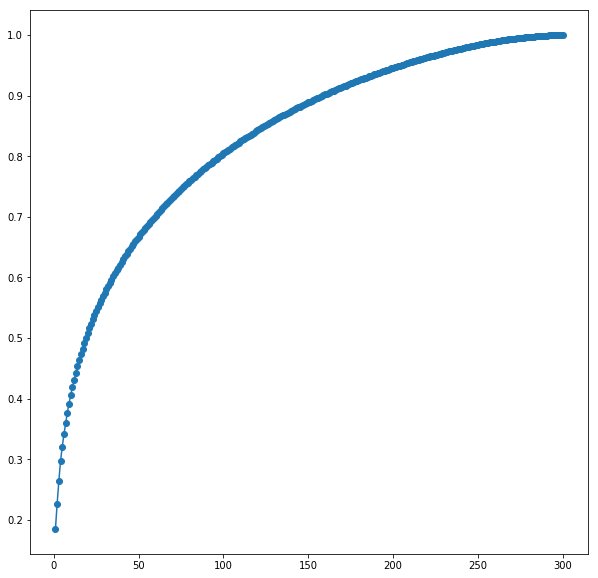

In [180]:
p3_util_plot.plot_pca_variance(dataPreparator_v2.xpca)